In [3]:
import numpy as np 
import pandas as pd 
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns        
import warnings
import pickle
from sklearn.metrics.pairwise import cosine_similarity 
warnings.filterwarnings("ignore")

In [5]:
#Reading the csv files
books = pd.read_csv("Books.csv")
users = pd.read_csv("Users.csv")
ratings = pd.read_csv("Ratings.csv")

In [6]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [7]:
# changing the display setting to show all data for checking
pd.set_option('display.max_rows', None)

In [8]:
print(books['Year-Of-Publication'].value_counts())

2002                 13903
2001                 13715
1999                 13414
2000                 13373
1998                 12116
2003                 11610
1997                 11494
1996                 10687
1995                 10259
1994                  8857
1993                  7920
1992                  7390
1991                  6926
1990                  6394
1989                  5825
1988                  5545
1987                  4761
2004                  4629
1986                  4258
1999                  4017
1985                  3912
2000                  3859
2002                  3724
1998                  3650
2001                  3644
1984                  3631
0                     3570
1997                  3396
1996                  3343
1983                  3297
1995                  3287
1982                  3132
1994                  2939
2003                  2748
1993                  2682
1992                  2516
1991                  2463
1

In [9]:
#Changing the data type of the year of publication
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], errors='coerce').fillna(0).astype(int)

In [10]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  int32 
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: int32(1), object(7)
memory usage: 15.5+ MB


In [11]:
with open('books.pickle', 'wb') as f:
    pickle.dump(books, f)

In [12]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [13]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [14]:
print(books.shape)
print(ratings.shape)
print(users.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


In [15]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [16]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [17]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [18]:
print(books.duplicated().sum())
print(users.duplicated().sum())
print(ratings.duplicated().sum())

0
0
0


In [19]:
ratings.rename(columns = {'Book-Rating':'Rate'}, inplace = True)

In [20]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   User-ID  1149780 non-null  int64 
 1   ISBN     1149780 non-null  object
 2   Rate     1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [68]:
#reseting the max display option
pd.reset_option('display.max_rows')

Text(0.5, 1.0, 'Number of books by an author (Top 20)')

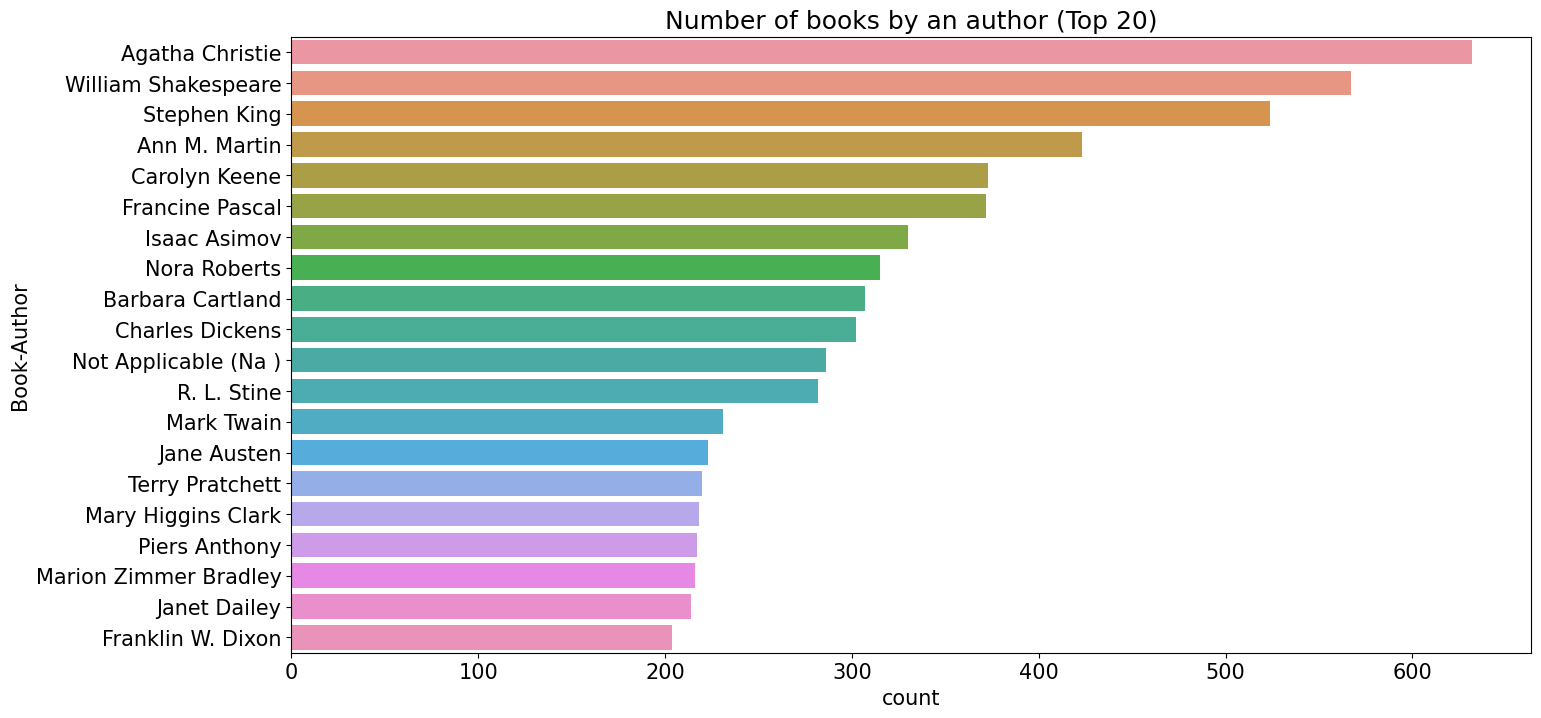

In [31]:
#Number of books by an author(top 20)
plt.figure(figsize=(16,8))
sns.countplot(y="Book-Author", data=books,order=books['Book-Author'].value_counts().index[0:20])
plt.title("Number of books by an author (Top 20)")

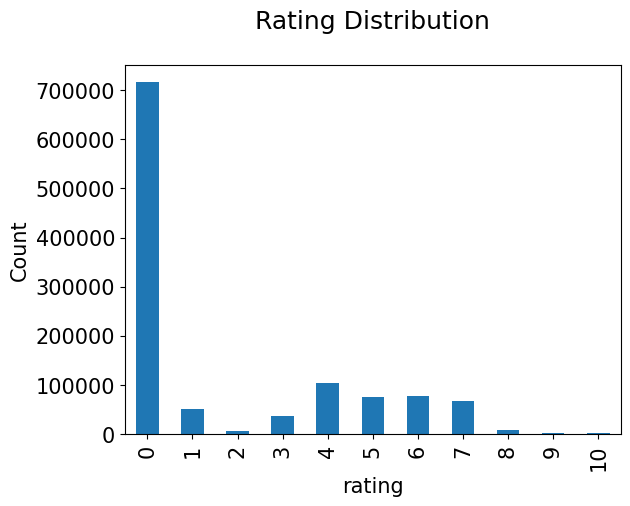

In [32]:
#Rating Distribution
plt.rc("font", size=15)
ratings_order = np.arange(11)
ratings.Rate.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('rating')
plt.ylabel('Count')
plt.xticks(ticks=ratings_order, labels=ratings_order)
plt.savefig('Rate_distribution.png', bbox_inches='tight')
plt.show()

Text(0.5, 1.0, 'Explicit Ratings')

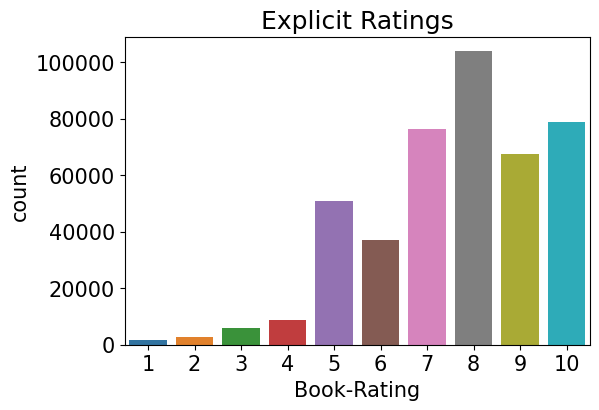

In [33]:
# Explicit Ratings
plt.figure(figsize=(6,4))
data = ratings[ratings['Rate'] != 0]
sns.countplot(x="Rate", data=data)
plt.xlabel("Book-Rating")
plt.title("Explicit Ratings")

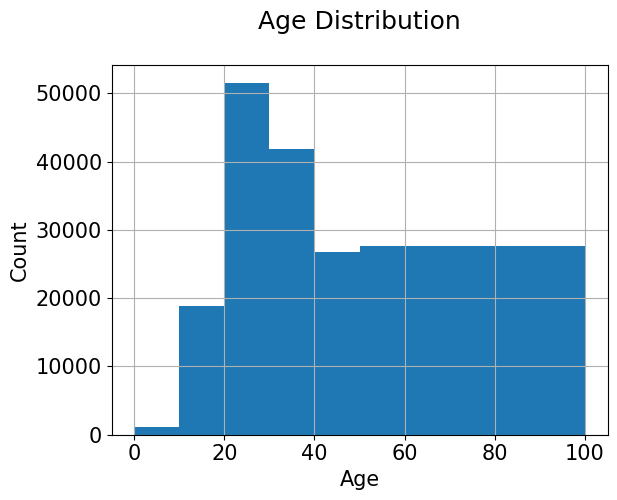

In [35]:
#Age Distribution
users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('user_age.png', bbox_inches='tight')
plt.show()

In [36]:
ratings_with_name = ratings.merge(books,on='ISBN')

In [37]:
ratings_with_name.head()

,User-ID,ISBN,Rate,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [38]:
ratings_with_name.drop(columns=["Image-URL-S","Image-URL-M"],axis=1,inplace=True)

In [39]:
complete_df = ratings_with_name.merge(users.drop("Age", axis=1), on="User-ID")
complete_df.head()

,User-ID,ISBN,Rate,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L,Location
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,"tyler, texas, usa"
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,"cincinnati, ohio, usa"
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,http://images.amazon.com/images/P/0812533550.0...,"cincinnati, ohio, usa"
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,http://images.amazon.com/images/P/0679745580.0...,"cincinnati, ohio, usa"
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,http://images.amazon.com/images/P/0060173289.0...,"cincinnati, ohio, usa"


In [40]:
complete_df['Location'] = complete_df['Location'].str.split(',').str[-1].str.strip()

In [41]:
complete_df.head()

,User-ID,ISBN,Rate,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L,Location
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,usa
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,usa
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,http://images.amazon.com/images/P/0812533550.0...,usa
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,http://images.amazon.com/images/P/0679745580.0...,usa
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,http://images.amazon.com/images/P/0060173289.0...,usa


In [42]:
report = ProfileReport(complete_df)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [46]:
#checking the data for a small location
complete_df[complete_df['Location']=='singapore'].head()

,User-ID,ISBN,Rate,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L,Location
352041,128461,0140279091,9,Saving Private Ryan,Max Allan Collins,1998,Penguin Books Ltd,http://images.amazon.com/images/P/0140279091.0...,singapore
524323,120565,0064430227,9,Harold and the Purple Crayon 50th Anniversary ...,Crockett Johnson,1981,HarperTrophy,http://images.amazon.com/images/P/0064430227.0...,singapore
524324,120565,0811811409,8,The Venetian's Wife: A Strangely Sensual Tale ...,Nick Bantock,1996,Chronicle Books,http://images.amazon.com/images/P/0811811409.0...,singapore
524325,120565,0099245027,9,The Testament,John Grisham,1999,Trafalgar Square,http://images.amazon.com/images/P/0099245027.0...,singapore
524326,120565,0375412123,9,A Multitude of Sins,RICHARD FORD,2002,Knopf,http://images.amazon.com/images/P/0375412123.0...,singapore


In [47]:
num_rating_df = complete_df.groupby('Book-Title').count()['Rate'].reset_index()
num_rating_df.rename(columns={'Rate': 'num_ratings'}, inplace=True)
num_rating_df.head(10)

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
5,Clifford Visita El Hospital (Clifford El Gran...,1
6,Dark Justice,1
7,Deceived,2
8,Earth Prayers From around the World: 365 Pray...,10
9,Final Fantasy Anthology: Official Strategy Gu...,4


In [48]:
avg_rating_df = complete_df.groupby('Book-Title').mean()['Rate'].reset_index()
avg_rating_df.rename(columns={'Rate': 'avg_ratings'}, inplace=True)
avg_rating_df.head(10)

,Book-Title,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,2.25
1,Always Have Popsicles,0.00
2,Apple Magic (The Collector's series),0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.00
4,Beyond IBM: Leadership Marketing and Finance ...,0.00
5,Clifford Visita El Hospital (Clifford El Gran...,0.00
6,Dark Justice,10.00
7,Deceived,0.00
8,Earth Prayers From around the World: 365 Pray...,5.00
9,Final Fantasy Anthology: Official Strategy Gu...,5.00


In [49]:
popularity_df = num_rating_df.merge(avg_rating_df, on='Book-Title')
popularity_df.head(10)

,Book-Title,num_ratings,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,4,2.25
1,Always Have Popsicles,1,0.00
2,Apple Magic (The Collector's series),1,0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.00
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.00
5,Clifford Visita El Hospital (Clifford El Gran...,1,0.00
6,Dark Justice,1,10.00
7,Deceived,2,0.00
8,Earth Prayers From around the World: 365 Pray...,10,5.00
9,Final Fantasy Anthology: Official Strategy Gu...,4,5.00


In [50]:
top_50 = popularity_df[popularity_df['num_ratings']>=250].sort_values("avg_ratings",ascending=False).head(50)
top_50.head()

,Book-Title,num_ratings,avg_ratings
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453


In [51]:
final_top_50 = top_50.merge(books, on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Publisher','num_ratings','avg_ratings','Image-URL-M','Year-Of-Publication']]

In [52]:
final_top_50['Image-URL-M'][0]

'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'

In [53]:
final_top_50.head()

,Book-Title,Book-Author,Publisher,num_ratings,avg_ratings,Image-URL-M,Year-Of-Publication
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,Scholastic,428,5.852804,http://images.amazon.com/images/P/0439136350.0...,1999
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,Scholastic,387,5.824289,http://images.amazon.com/images/P/0439139597.0...,2000
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,Scholastic,278,5.737410,http://images.amazon.com/images/P/0590353403.0...,1998
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,Scholastic,347,5.501441,http://images.amazon.com/images/P/043935806X.0...,2003
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,Scholastic,556,5.183453,http://images.amazon.com/images/P/0439064872.0...,2000


In [54]:
final_top_50.shape

(50, 7)

In [55]:
with open('final_top_50.pickle', 'wb') as f:
    pickle.dump(final_top_50, f)

### Collaborative Filtering Based Recommender System


In [56]:
x = complete_df.groupby('User-ID').count()['Rate']>200
knowledgable_users = x[x].index

In [57]:
filtered_rating = complete_df[complete_df['User-ID'].isin(knowledgable_users)]

In [58]:
y = filtered_rating.groupby('Book-Title').count()['Rate']>=50
famous_books = y[y].index

In [59]:
final_ratings =  filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [69]:
Book_list = final_ratings['Book-Title'].unique()
Book_list=pd.DataFrame(Book_list)
Book_list = Book_list.rename(columns={ 0 : 'Book-Title'}) 
Book_list 

,Book-Title
0,The Lovely Bones: A Novel
1,The Da Vinci Code
2,Wild Animus
3,Four To Score (A Stephanie Plum Novel)
4,Roses Are Red (Alex Cross Novels)
...,...
701,A Great Deliverance
702,The Angel of Darkness
703,Tell Me Lies (Tell Me Lies)
704,Devices and Desires


In [70]:
with open('Book_list.pickle', 'wb') as f:
    pickle.dump(Book_list, f)

In [71]:
Fin_rate = final_ratings.pivot_table(index='Book-Title',columns='User-ID'
                          ,values='Rate')
Fin_rate

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,0.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [72]:
Fin_rate.fillna(0,inplace=True)
Fin_rate

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
with open('Fin_rate.pickle', 'wb') as f:
    pickle.dump(Fin_rate, f)

In [74]:
similarity_score = cosine_similarity(Fin_rate)

In [75]:
similarity_score.shape

(706, 706)

In [76]:
with open('similarity_score.pickle', 'wb') as f:
    pickle.dump(similarity_score, f)

In [77]:
def recommend(book_name):
    index = np.where(Fin_rate.index==book_name)[0][0]
    similar_books = sorted(list(enumerate(similarity_score[index])),key=lambda x:x[1], reverse=True)[1:11]
    
    data = []
    
    for i in similar_books:
        item = []
        temp_df = books[books['Book-Title'] == Fin_rate.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        data.append(item)
    return data

In [78]:
recommend('Wild Animus')

[['Pay It Forward',
  'Catherine Ryan Hyde',
  'http://images.amazon.com/images/P/0743412028.01.MZZZZZZZ.jpg'],
 ['At Home in Mitford (The Mitford Years)',
  'Jan Karon',
  'http://images.amazon.com/images/P/014025448X.01.MZZZZZZZ.jpg'],
 ['The First Counsel',
  'Brad Meltzer',
  'http://images.amazon.com/images/P/0446527289.01.MZZZZZZZ.jpg'],
 ['The Andromeda Strain',
  'MICHAEL CRICHTON',
  'http://images.amazon.com/images/P/0345378482.01.MZZZZZZZ.jpg'],
 ['The Tao of Pooh',
  'Benjamin Hoff',
  'http://images.amazon.com/images/P/0140067477.01.MZZZZZZZ.jpg'],
 ['The Reader',
  'Bernhard Schlink',
  'http://images.amazon.com/images/P/0679442790.01.MZZZZZZZ.jpg'],
 ['Hearts in Atlantis',
  'Stephen King',
  'http://images.amazon.com/images/P/0743436210.01.MZZZZZZZ.jpg'],
 ['A Lesson Before Dying (Vintage Contemporaries (Paperback))',
  'Ernest J. Gaines',
  'http://images.amazon.com/images/P/0375702709.01.MZZZZZZZ.jpg'],
 ['A Year in Provence',
  'Peter Mayle',
  'http://images.amazon.

In [79]:
recommend("The Da Vinci Code")

[['Angels &amp; Demons',
  'Dan Brown',
  'http://images.amazon.com/images/P/0671027360.01.MZZZZZZZ.jpg'],
 ['Touching Evil',
  'Kay Hooper',
  'http://images.amazon.com/images/P/0553583441.01.MZZZZZZZ.jpg'],
 ['Saving Faith',
  'David Baldacci',
  'http://images.amazon.com/images/P/0446608890.01.MZZZZZZZ.jpg'],
 ["The Sweet Potato Queens' Book of Love",
  'JILL CONNER BROWNE',
  'http://images.amazon.com/images/P/0609804138.01.MZZZZZZZ.jpg'],
 ['Middlesex: A Novel',
  'Jeffrey Eugenides',
  'http://images.amazon.com/images/P/0312422156.01.MZZZZZZZ.jpg'],
 ['The Lovely Bones: A Novel',
  'Alice Sebold',
  'http://images.amazon.com/images/P/0316666343.01.MZZZZZZZ.jpg'],
 ['Timeline',
  'MICHAEL CRICHTON',
  'http://images.amazon.com/images/P/0345417623.01.MZZZZZZZ.jpg'],
 ['The Blue Nowhere : A Novel',
  'Jeffery Deaver',
  'http://images.amazon.com/images/P/0671042262.01.MZZZZZZZ.jpg'],
 ['Sea Glass: A Novel',
  'Anita Shreve',
  'http://images.amazon.com/images/P/0316089699.01.MZZZZZZ

In [80]:
recommend("Saving Faith")

[['Last Man Standing',
  'David Baldacci',
  'http://images.amazon.com/images/P/0446525804.01.MZZZZZZZ.jpg'],
 ["The Sweet Potato Queens' Book of Love",
  'JILL CONNER BROWNE',
  'http://images.amazon.com/images/P/0609804138.01.MZZZZZZZ.jpg'],
 ['C Is for Corpse (Kinsey Millhone Mysteries (Paperback))',
  'Sue Grafton',
  'http://images.amazon.com/images/P/0553280368.01.MZZZZZZZ.jpg'],
 ['Harvest',
  'BELVA PLAIN',
  'http://images.amazon.com/images/P/0440208912.01.MZZZZZZZ.jpg'],
 ['Hearts in Atlantis',
  'Stephen King',
  'http://images.amazon.com/images/P/0743436210.01.MZZZZZZZ.jpg'],
 ['Wish You Well',
  'David Baldacci',
  'http://images.amazon.com/images/P/0446527165.01.MZZZZZZZ.jpg'],
 ['Exclusive',
  'Sandra Brown',
  'http://images.amazon.com/images/P/0446604232.01.MZZZZZZZ.jpg'],
 ['Second Nature',
  'Alice Hoffman',
  'http://images.amazon.com/images/P/0399139087.01.MZZZZZZZ.jpg'],
 ["The General's Daughter",
  'Nelson DeMille',
  'http://images.amazon.com/images/P/044651306

In [81]:
recommend("1984")

[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg'],
 ['The Hours : A Novel',
  'Michael Cunningham',
  'http://images.amazon.com/images/P/0312243022.01.MZZZZZZZ.jpg'],
 ['Fahrenheit 451',
  'Ray Bradbury',
  'http://images.amazon.com/images/P/3257208626.01.MZZZZZZZ.jpg'],
 ['The Catcher in the Rye',
  'J.D. Salinger',
  'http://images.amazon.com/images/P/0316769487.01.MZZZZZZZ.jpg'],
 ['Naked',
  'David Sedaris',
  'http://images.amazon.com/images/P/0316777730.01.MZZZZZZZ.jpg'],
 ['The Hundred Secret Senses',
  'Amy Tan',
  'http://images.amazon.com/images/P/0399141146.01.MZZZZZZZ.jpg']

In [82]:
recommend("Harry Potter and the Prisoner of Azkaban (Book 3)")

[['Harry Potter and the Goblet of Fire (Book 4)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439139597.01.MZZZZZZZ.jpg'],
 ['Harry Potter and the Chamber of Secrets (Book 2)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439064872.01.MZZZZZZZ.jpg'],
 ['Harry Potter and the Order of the Phoenix (Book 5)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/043935806X.01.MZZZZZZZ.jpg'],
 ["Harry Potter and the Sorcerer's Stone (Book 1)",
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0590353403.01.MZZZZZZZ.jpg'],
 ["Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",
  'J. K. Rowling',
  'http://images.amazon.com/images/P/059035342X.01.MZZZZZZZ.jpg'],
 ['The Fellowship of the Ring (The Lord of the Rings, Part 1)',
  'J.R.R. TOLKIEN',
  'http://images.amazon.com/images/P/0345339703.01.MZZZZZZZ.jpg'],
 ["Charlotte's Web (Trophy Newbery)",
  'E. B. White',
  'http://images.amazon.com/images/P/0064400557.01.MZZZZZZZ.jpg'],
 ['Anne of Avon